# Combinatorial library vs. KLIFS

## Aim of this notebook

In this notebook we want to compare the combinatorial library to the original KLIFS ligands, i.e. the ligands from which the fragment library originates from.

## Table of contents

1. Combinatorial library data
2. Exact matches
3. Substructure matches

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import ijson
import pandas as pd
from rdkit.Chem import Draw, PandasTools

from utils import read_fragment_library, construct_ligand

In [3]:
PATH_COMBINATORIAL_LIBRARY = Path('../data/combinatorial_library/combinatorial_library.json')

## 1. Combinatorial library data

The combinatorial library comes as large JSON file. In order to access/filter ligands efficiently (time and memory), we use the `ijson` library:

> Ijson is an iterative JSON parser with standard Python iterator interfaces.

https://pypi.org/project/ijson/

For a detailed description on the kind of information linked to the combinatorial library, please take a look at the notebook `notebooks/4_1_combinatorial_library_properties.ipynb`.

## 2. Original ligands

In [4]:
original_ligands = pd.read_csv('../data/fragment_library/original_ligands.csv', index_col=0)
PandasTools.AddMoleculeColumnToFrame(original_ligands, 'smiles')
original_ligands.reset_index(inplace=True)
print(f'Number of original ligands: {original_ligands.shape[0]}')

Number of original ligands: 2553


In [5]:
original_ligands_ix = pd.read_csv('/home/dominique/Desktop/original_ligands_index.csv', index_col=0)

In [6]:
original_ligands = pd.merge(
    original_ligands_ix, original_ligands, on=['kinase', 'complex_pdb'], how='left'
)

,kinase,complex_pdb,ligand_pdb,subpocket,family,group,alt,chain,ac_helix,smiles,ROMol
0,p38a,5xyx,FTZ,"['AP', 'GA']",MAPK,CMGC,B,A,in,Fc1cccc(Cl)c1CNc1nc(-c2ccco2)n[nH]1,
1,BRAF,3og7,032,"['AP', 'SE', 'GA', 'B1']",RAF,TKL,,A,out,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...,
2,BRAF,4yht,4EF,"['AP', 'FP', 'GA']",RAF,TKL,,A,in,CNS(=O)(=O)c1ccc(N2CCOCC2)c(Nc2ncnc3[nH]cc(Cl)...,
3,TYK2,5f1z,5U3,"['AP', 'FP', 'SE']",JakA,TK,A,A,in,CC(C)[C@H](C)n1cc(-c2cc(C(C)(C)O)n(C)n2)c2[nH]...,
4,JAK2,4aqc,88A,"['AP', 'FP', 'SE']",JakA,TK,B,B,in,CS(=O)(=O)c1ccc(-c2cccn3nc(Nc4ccc(N5CCOCC5)cc4...,

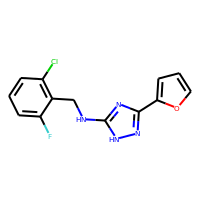
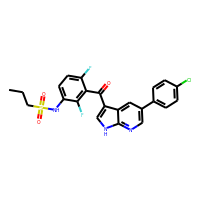
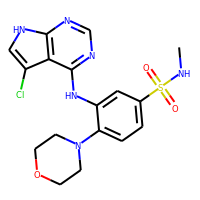
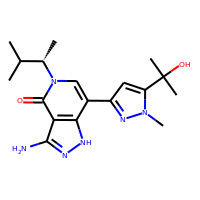
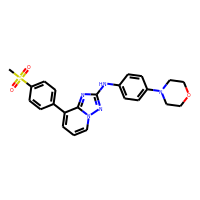

In [7]:
#Draw.MolsToGridImage(list(original_ligands.ROMol), maxMols=600, molsPerRow=6)
original_ligands.head()

## 2. Reduced fragment library

In [35]:
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
fragment_library.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

## 2. Exact matches

Get recombined ligands in combinatorial library that have exact matches in the KLIFS original ligands.

In [39]:
exact_matches = pd.read_json('../data/combinatorial_library/original_exact.json')

In [40]:
print(exact_matches.shape[0])
exact_matches.head(2)

35


,bond_ids,fragment_ids,hba,hbd,mwt,logp,n_atoms,chembl_exact,original_exact,original_substructure,inchi
0,"[[SE_10, AP_9], [FP_10, AP_8]]","[FP_14, SE_22, AP_95]",1,1,1,1,28,1,1,1,InChI=1S/C21H17N5O2/c1-28-18-11-24-20(13-8-12-...
1,"[[B1_7, GA_10], [AP_12, GA_9]]","[GA_35, AP_134, B1_19]",1,1,1,1,28,0,1,1,InChI=1S/C22H17ClFN3O/c1-14-5-7-20-18(9-14)22(...


#### Construct recombined ligands

In [42]:
recombined_ligands = []

for index, row in exact_matches.iterrows():
    
    recombined_ligand = construct_ligand(row.fragment_ids, row.bond_ids, fragment_library)
    recombined_ligands.append(recombined_ligand)

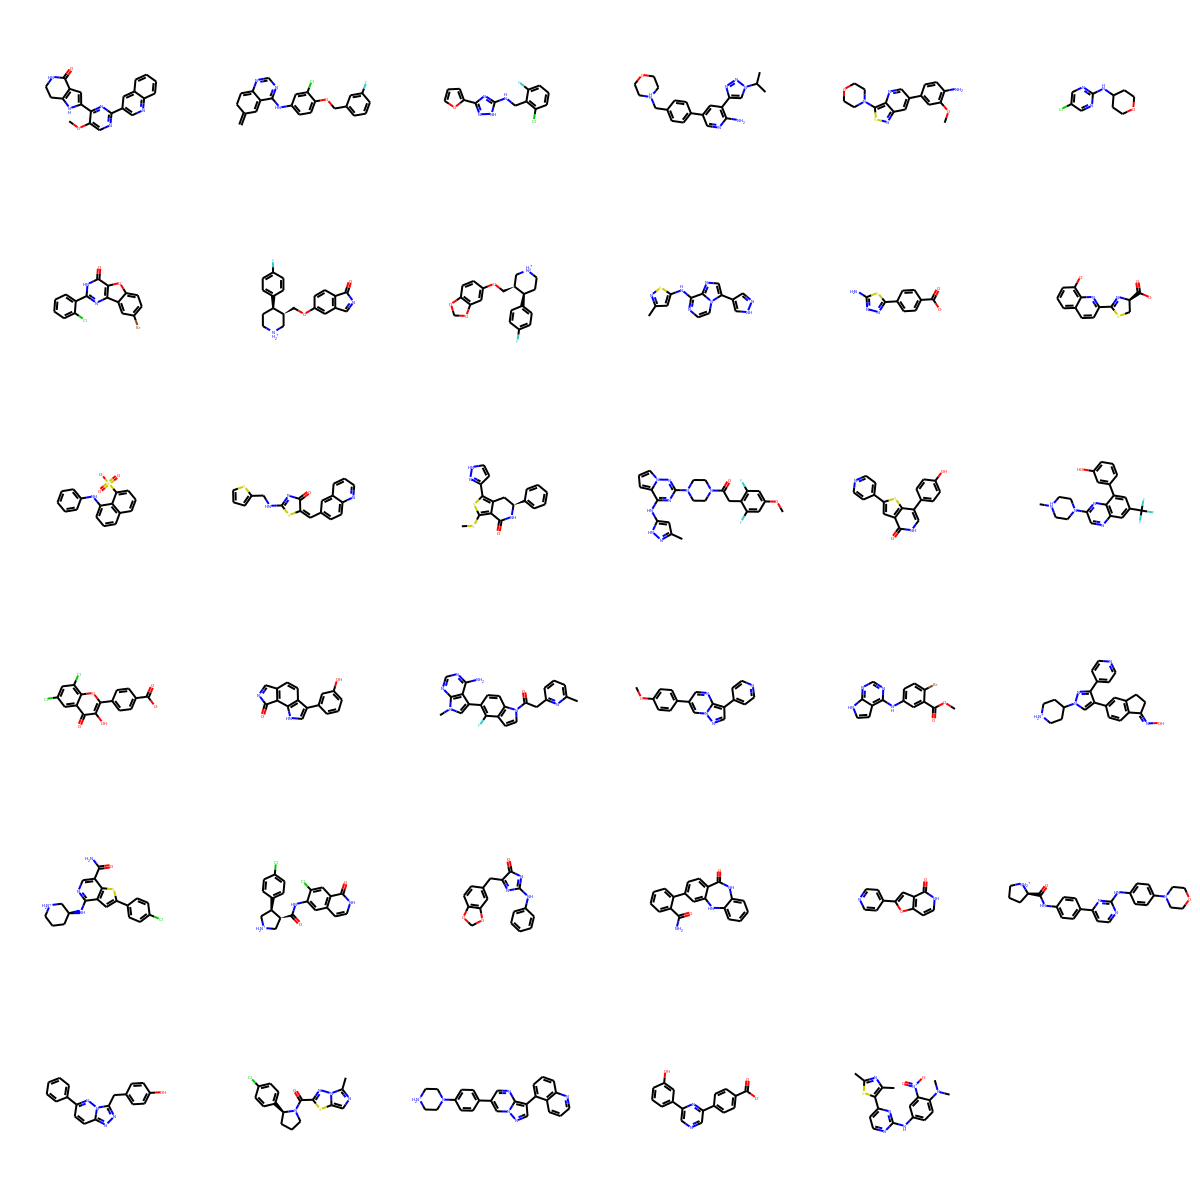

In [45]:
Draw.MolsToGridImage(recombined_ligands, molsPerRow=6)

## 3. Substructure matches

Get recombined ligands in combinatorial library that have substructure matches in the KLIFS original ligands.

In [47]:
substructure_matches = pd.read_json('../data/combinatorial_library/original_substructure.json')

In [48]:
print(substructure_matches.shape[0])
substructure_matches.head(2)

325


,bond_ids,fragment_ids,hba,hbd,mwt,logp,n_atoms,chembl_exact,original_exact,original_substructure,inchi
0,"[[GA_4, FP_7], [SE_10, AP_8], [FP_6, AP_7]]","[SE_18, AP_14, GA_40, FP_3]",1,1,1,1,26,0,0,1,InChI=1S/C18H23N5O3/c1-25-14-6-5-13(10-15(14)2...
1,"[[FP_8, AP_7], [SE_7, AP_8], [GA_6, FP_7]]","[GA_45, SE_27, FP_128, AP_14]",1,1,1,1,27,0,0,1,InChI=1S/C21H23N5O/c22-15-8-10-16(11-9-15)25-2...
